**Import all libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from skimpy import skim
from scipy.stats import skew, boxcox

**loading data**

In [2]:
df=pd.read_csv(r"C:\Users\Barry\Desktop\projects\indus_copper\daily_offers.xlsx.csv")
df.shape

(181673, 14)

In [3]:
data=df.copy()

In [4]:
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [5]:
data.shape

(181673, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# Data Preprocessing

**Droping unwanted features**

In [7]:
data=data.drop(columns=['id','item_date','material_ref','delivery date','customer'])

In [8]:
data.head(3)

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30.0,Won,WI,28.0,0.38,952.0,628377,644.33


In [9]:
data.drop_duplicates(inplace=True) #droping duplicates

In [10]:
data.dropna(inplace=True) #droping null values if any

In [11]:
data.shape

(181641, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181641 entries, 0 to 181672
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181641 non-null  object 
 1   country        181641 non-null  float64
 2   status         181641 non-null  object 
 3   item type      181641 non-null  object 
 4   application    181641 non-null  float64
 5   thickness      181641 non-null  float64
 6   width          181641 non-null  float64
 7   product_ref    181641 non-null  int64  
 8   selling_price  181641 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 13.9+ MB


In [13]:
data.isnull().sum() #checking for null values

quantity tons    0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

**check for errors or currupt values**

In [14]:
for i in range(len(data.columns)):
    print(data.iloc[:,i].value_counts())

54.15113862    1
37.235676      1
38.27463238    1
128.4503502    1
30.11096804    1
              ..
4.977580329    1
1003.530017    1
5.415144171    1
14.59587589    1
406.6865384    1
Name: quantity tons, Length: 181641, dtype: int64
78.0     32084
26.0     27516
25.0     23361
27.0     21509
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       818
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64
Won                116010
Lost                34433
Not lost for AM     19568
Revised              4276
To be approved       4169
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64
W         105612
S          69207
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64
10.0    77539
41.0    46260
15.0    20771
59.0     8926
42.0     5858


In [15]:
data.head(2)

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,28.0,Won,W,10.0,2.0,1500.0,1670798778,854.0
1,768.024839,25.0,Won,W,41.0,0.8,1210.0,1668701718,1047.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181641 entries, 0 to 181672
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181641 non-null  object 
 1   country        181641 non-null  float64
 2   status         181641 non-null  object 
 3   item type      181641 non-null  object 
 4   application    181641 non-null  float64
 5   thickness      181641 non-null  float64
 6   width          181641 non-null  float64
 7   product_ref    181641 non-null  int64  
 8   selling_price  181641 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 13.9+ MB


Column "quantity tons"

In [17]:
# Feature quantity tons is being read as object type .converting it into float64 type
data.loc[data["quantity tons"]!="e",:]
data=data.loc[data['quantity tons']!="e"]
data['quantity tons']=data['quantity tons'].astype('float64')

In [18]:
#inorder to capture lead we only need won and lost data ,and remaining will be removed.
data.status.value_counts()

Won                116009
Lost                34433
Not lost for AM     19568
Revised              4276
To be approved       4169
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

Column "status"

In [19]:
data=data.loc[data.status.isin(['Won','Lost']),:]

In [20]:
data['status']=data['status'].map({'Won':1,'Lost':0})
#Won is considered as success and Lost i s being considered as failure in getting lead
data['status']=data['status'].astype('int64')

In [21]:
data.status.value_counts()

1    116009
0     34433
Name: status, dtype: int64

Column "item type"

In [22]:
data['item type'].value_counts() # 463 values are of 'Others' type.  for which we dont item type

W         91953
S         52462
PL         5032
WI          504
Others      463
IPL          27
SLAWR         1
Name: item type, dtype: int64

In [23]:
data=data.loc[data['item type']!='Others',:]

In [24]:
data.shape

(149979, 9)

Converting categorical to numerical column

**Encoding**

In [25]:
Final_data = pd.get_dummies(data, columns = ['item type'])
#reset indexes so avoid column index in dataframe
Final_data=Final_data.reset_index(drop=True)

In [26]:
Final_data.head(3)

,quantity tons,country,status,application,thickness,width,product_ref,selling_price,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,54.151139,28.0,1,10.0,2.00,1500.0,1670798778,854.00,0,0,0,0,1,0
1,768.024839,25.0,1,41.0,0.80,1210.0,1668701718,1047.00,0,0,0,0,1,0
2,386.127949,30.0,1,28.0,0.38,952.0,628377,644.33,0,0,0,0,0,1


In [27]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149979 entries, 0 to 149978
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   quantity tons    149979 non-null  float64
 1   country          149979 non-null  float64
 2   status           149979 non-null  int64  
 3   application      149979 non-null  float64
 4   thickness        149979 non-null  float64
 5   width            149979 non-null  float64
 6   product_ref      149979 non-null  int64  
 7   selling_price    149979 non-null  float64
 8   item type_IPL    149979 non-null  uint8  
 9   item type_PL     149979 non-null  uint8  
 10  item type_S      149979 non-null  uint8  
 11  item type_SLAWR  149979 non-null  uint8  
 12  item type_W      149979 non-null  uint8  
 13  item type_WI     149979 non-null  uint8  
dtypes: float64(6), int64(2), uint8(6)
memory usage: 10.0 MB


In [28]:
Final_data.shape

(149979, 14)


# EDA

Checking for outliers

In [29]:
Final_data.describe()

,quantity tons,country,status,application,thickness,width,product_ref,selling_price,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
count,149979.000000,149979.000000,149979.000000,149979.00000,149979.000000,149979.000000,1.499790e+05,149979.000000,149979.000000,149979.000000,149979.000000,149979.000000,149979.000000,149979.000000
mean,94.092781,45.442289,0.770588,25.19298,2.618808,1298.170059,4.749983e+08,825.831466,0.000180,0.033551,0.349796,0.000007,0.613106,0.003360
std,441.280306,24.507422,0.420456,17.63823,7.125347,265.846366,7.173067e+08,291.197250,0.013416,0.180072,0.476907,0.002582,0.487041,0.057872
min,-2000.000000,25.000000,0.000000,2.00000,0.180000,1.000000,6.117280e+05,-1160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.654427,26.000000,1.000000,10.00000,0.740000,1178.000000,6.283770e+05,671.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.877191,30.000000,1.000000,15.00000,1.500000,1250.000000,6.406650e+05,811.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,64.342550,78.000000,1.000000,41.00000,3.000000,1500.000000,1.332077e+09,952.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,70252.363070,113.000000,1.000000,99.00000,2500.000000,2990.000000,1.722208e+09,81236.140000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
skim(Final_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 149979 │ │ int32       │ 8     │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA % ┃ mean      ┃ sd        ┃ p0     ┃ p25    ┃ p75        ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ quantity tons    │   0 │    0 │        94 │       440 │  -2000 │     11 │         64 │      70000 │   █    │  │
│ │ country          │   0 │    0 │        45 │        25 │     25 │     26 │         78 │        110 │ █  ▃▁  │  │
│ │ status           │   0 │    0 │      0.77 │      0.42 │      0 │      1 │          1 │          1 │ ▂    █ │  │
│ │ application      │   0 │    0 │        25 │        18 │      2 │     10 │         41 │         99 │  █▁▄▁  │  │
│ │ thickness        │   0 │    0 │       2.6 │       7.1 │   0.18 │   0.74 │          3 │       2500 │   █    │  │
│ │ width            │   0 │    0 │      1300 │       270 │      1 │   1200 │       1500 │       3000 │  ▁█▃▁  │  │
│ │ product_ref      │   0 │    0 │ 470000000 │ 720000000 │ 610000 │ 630000 │ 1300000000 │ 1700000000 │ █    ▃ │  │
│ │ selling_price    │   0 │    0 │       830 │       290 │  -1200 │    670 │        950 │      81000 │   █    │  │
│ │ item type_IPL    │   0 │    0 │   0.00018 │     0.013 │      0 │      0 │          0 │          1 │   █    │  │
│ │ item type_PL     │   0 │    0 │     0.034 │      0.18 │      0 │      0 │          0 │          1 │   █    │  │
│ │ item type_S      │   0 │    0 │      0.35 │      0.48 │      0 │      0 │          1 │          1 │ █    ▄ │  │
│ │ item type_SLAWR  │   0 │    0 │   6.7e-06 │    0.0026 │      0 │      0 │          0 │          1 │   █    │  │
│ │ item type_W      │   0 │    0 │      0.61 │      0.49 │      0 │      0 │          1 │          1 │ ▅    █ │  │
│ │ item type_WI     │   0 │    0 │    0.0034 │     0.058 │      0 │      0 │          0 │          1 │   █    │  │
│ └──────────────────┴─────┴──────┴───────────┴───────────┴────────┴────────┴────────────┴────────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

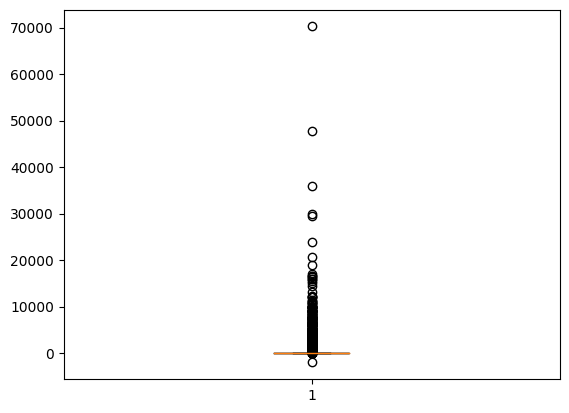

In [31]:
plt.boxplot(Final_data['quantity tons']) #outlier is present 
plt.show()

In [32]:
#IQR
Q3=64
Q1=11
IQR=Q3-Q1
print(f"inter qruartile range{IQR}")
print(f"Outlier value:{Q3+1.5*IQR}")
print(f"Outlier value:{Q1-1.5*IQR}")

inter qruartile range53
Outlier value:143.5
Outlier value:-68.5


In [33]:
#Quantity cannot be negative so lets remove the -ve values
Final_data.loc[Final_data['quantity tons'] <= 0]

,quantity tons,country,status,application,thickness,width,product_ref,selling_price,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
88152,-4.0,27.0,1,15.0,1.50,1500.0,1332077137,723.0,0,0,1,0,0,0
149967,-18.0,25.0,1,41.0,0.84,1220.0,164141591,590.0,0,0,0,0,1,0
149977,-2000.0,25.0,1,41.0,0.85,1250.0,164141591,601.0,0,0,0,0,1,0


In [34]:
Final_data=Final_data.loc[~(Final_data['quantity tons'] <= 0)]

In [35]:
Final_data=Final_data.loc[~(Final_data['quantity tons'] > 500)]

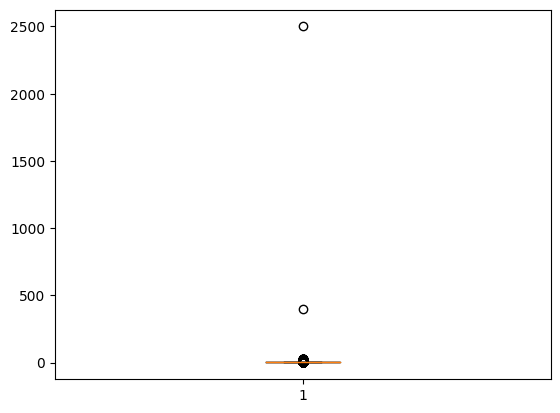

In [36]:
#Extream outlier present in thicknes column
plt.boxplot(Final_data['thickness'])  
plt.show()

From above skim chart we can see that 75% of data value is 3

In [37]:
#IQR
Q3=3
Q1=0.18
IQR=Q3-Q1
print(f"inter qruartile range{IQR}")
print(f"Outlier value:{Q3+1.5*IQR}")
print(f"Outlier value:{Q1-1.5*IQR}")

inter qruartile range2.82
Outlier value:7.2299999999999995
Outlier value:-4.05


In [38]:
Final_data=Final_data.loc[(Final_data['thickness'] <= 7.22)]

In [39]:
Final_data.shape

(134532, 14)

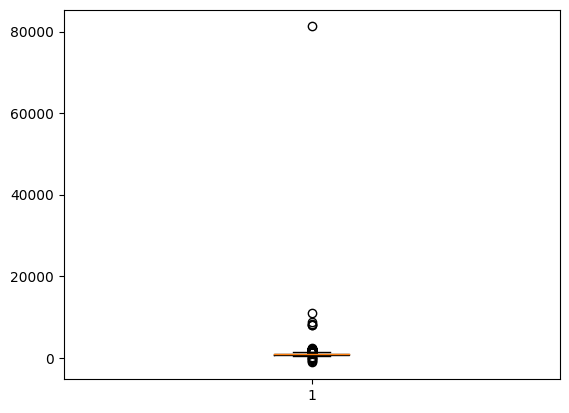

In [40]:
#selling price have some extream outliers
plt.boxplot(Final_data['selling_price'])  
plt.show()

In [41]:
#from skimpy summary
Q3=950
Q1=670
IQR=Q3-Q1
print(f"inter qruartile range{IQR}")
print(f"Outlier value:{Q3+1.5*IQR}")
print(f"Outlier value:{Q1-1.5*IQR}")

inter qruartile range280
Outlier value:1370.0
Outlier value:250.0


In [42]:
Final_data.loc[Final_data['selling_price']>=3000]

,quantity tons,country,status,application,thickness,width,product_ref,selling_price,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
63405,17.995508,78.0,1,41.0,1.15,1500.0,611993,8166.00,0,0,0,0,1,0
94736,4.774096,78.0,1,41.0,1.15,1500.0,611993,8062.00,0,0,0,0,1,0
102015,1.792484,84.0,1,41.0,0.50,1250.0,611993,81236.14,0,0,0,0,1,0
102929,9.509518,32.0,1,10.0,0.75,1000.0,611993,10913.00,0,0,0,0,1,0
116448,7.712359,78.0,1,41.0,1.15,1500.0,611993,8032.00,0,0,0,0,1,0
126651,84.282044,78.0,1,41.0,0.50,1050.0,611993,8748.00,0,0,0,0,1,0


In [43]:
Final_data.loc[Final_data['selling_price']<=0] #selling price cannot be <= 0

,quantity tons,country,status,application,thickness,width,product_ref,selling_price,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
22,99.059199,30.0,1,41.0,0.595,1207.0,611993,-1160.0,0,0,0,0,1,0
36776,101.397995,32.0,1,41.0,1.250,1100.0,1721130331,-730.0,0,0,0,0,1,0
36821,12.225889,78.0,1,41.0,0.750,1250.0,164141591,-445.0,0,0,0,0,1,0
87725,5.280274,25.0,1,15.0,6.000,1250.0,1671863738,-336.0,0,0,0,0,1,0


In [44]:
Final_data=Final_data.loc[Final_data['selling_price']<=3000]
Final_data=Final_data.loc[Final_data['selling_price']>0]

In [45]:
Final_data.shape

(134522, 14)

In [46]:
Final_data.head(2)

,quantity tons,country,status,application,thickness,width,product_ref,selling_price,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,54.151139,28.0,1,10.0,2.00,1500.0,1670798778,854.00,0,0,0,0,1,0
2,386.127949,30.0,1,28.0,0.38,952.0,628377,644.33,0,0,0,0,0,1


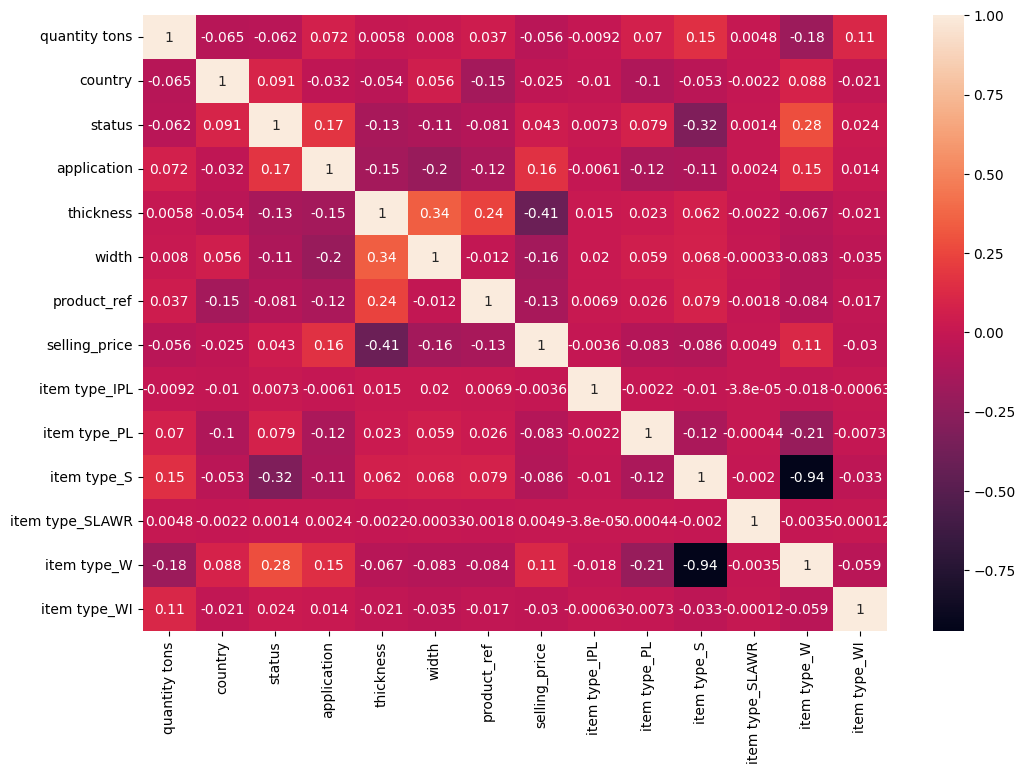

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(Final_data.corr(), annot=True)
plt.show()

**Data Distribution**

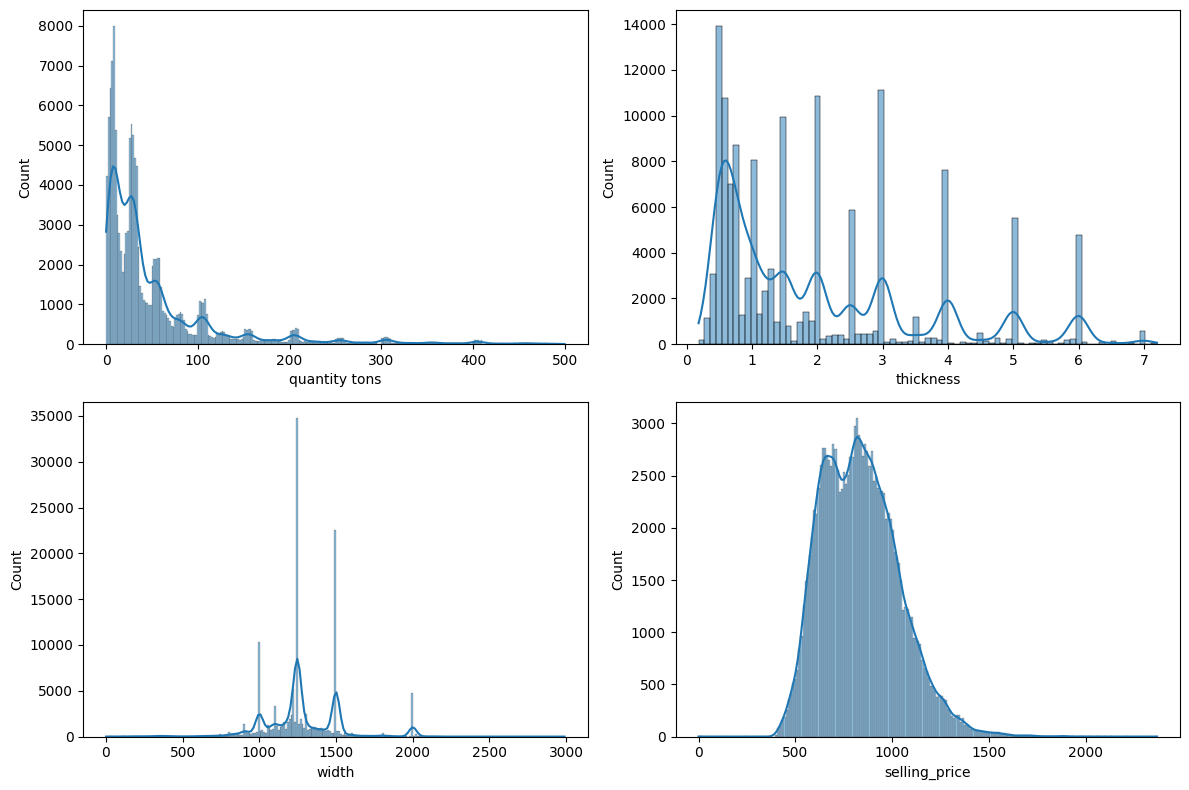

In [48]:
# Create a figure with subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
axs = axs.flatten()

# Loop through each column and create a subplot
for i, column in enumerate(['quantity tons', 'thickness', 'width', 'selling_price']):
    sns.histplot(data=Final_data, x=column, ax=axs[i], kde=True)
    axs[i].set_xlabel(column)


# Show the plot
plt.tight_layout()
plt.show()

From above plot we can say tha data is skewed towords right ,so transformation is required to make it symmetrical or normal.

<Axes: xlabel='thickness', ylabel='selling_price'>

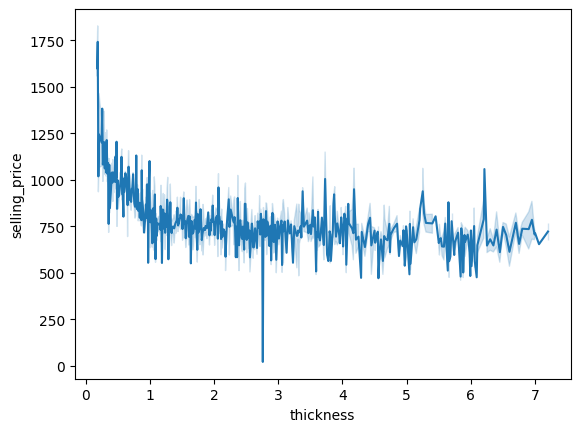

In [49]:
sns.lineplot(data=Final_data, x=Final_data["thickness"], y=Final_data["selling_price"])

<Axes: xlabel='quantity tons', ylabel='selling_price'>

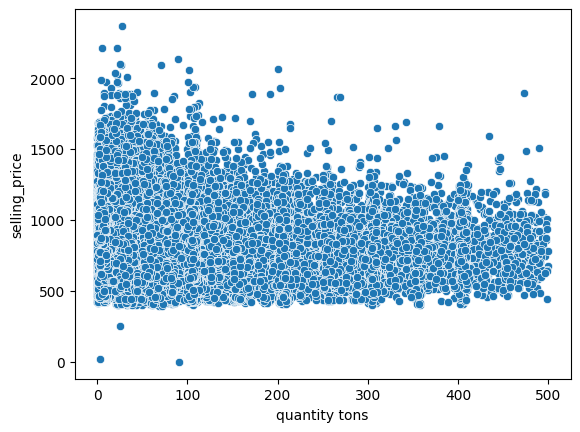

In [50]:
sns.scatterplot(data=Final_data, x=Final_data["quantity tons"], y=Final_data["selling_price"])

From above plot we can see that there no much linear relationship between dependent and independent variables

# Data Transformation 

Lambda value used for Transformation: 0.11547747509497573


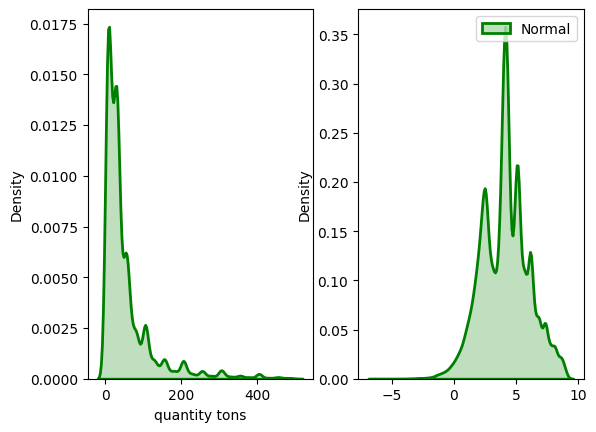

In [51]:
original_data = Final_data['quantity tons']
 
# transform training data & save lambda value
fitted_data, fitted_lambda = boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# # rescaling the subplots
# fig.set_figheight(5)
# fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")
Final_data['quantity tons']=pd.DataFrame(fitted_data)

Lambda value used for Transformation: -0.0863023319681121


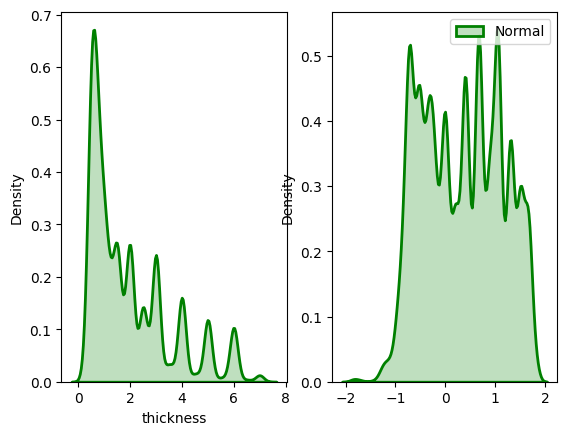

In [52]:
original_data = Final_data['thickness']
 
# transform training data & save lambda value
fitted_data, fitted_lambda = boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# # rescaling the subplots
# fig.set_figheight(5)
# fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")
Final_data['thickness']=pd.DataFrame(fitted_data)

Lambda value used for Transformation: 0.9455080048052276


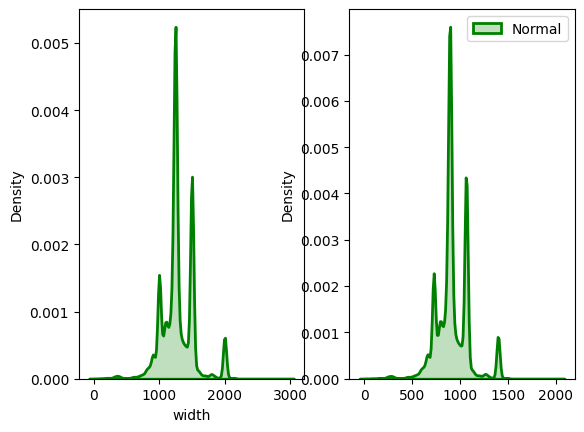

In [53]:
original_data = Final_data['width']
 
# transform training data & save lambda value
fitted_data, fitted_lambda = boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# # rescaling the subplots
# fig.set_figheight(5)
# fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")
Final_data['width']=pd.DataFrame(fitted_data)

In [54]:
Final_data.isnull().sum()

quantity tons      13644
country                0
status                 0
application            0
thickness          13644
width              13644
product_ref            0
selling_price          0
item type_IPL          0
item type_PL           0
item type_S            0
item type_SLAWR        0
item type_W            0
item type_WI           0
dtype: int64

In [55]:
#imputing null values with central measure
Final_data['quantity tons']=Final_data['quantity tons'].fillna(Final_data['quantity tons'].median())
Final_data['thickness']=Final_data['thickness'].fillna(Final_data['thickness'].median())
Final_data['width']=Final_data['width'].fillna(Final_data['width'].median())

# Feature Engineering

Creating some relavant features using existing features.

In [56]:
Final_data['total_thickness']=Final_data['quantity tons']*Final_data['thickness']
Final_data['total_width']=Final_data['quantity tons']*Final_data['width']

In [57]:
#Droping features(quantity tons,thickness and width)
Final_data.drop(columns=['quantity tons','thickness','width'],inplace=True)

In [58]:
Final_data.isnull().sum()

country            0
status             0
application        0
product_ref        0
selling_price      0
item type_IPL      0
item type_PL       0
item type_S        0
item type_SLAWR    0
item type_W        0
item type_WI       0
total_thickness    0
total_width        0
dtype: int64

In [59]:
Final_data.shape

(134522, 13)

In [60]:
Final_data.head(2)

,country,status,application,product_ref,selling_price,item type_IPL,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI,total_thickness,total_width
0,28.0,1,10.0,1670798778,854.00,0,0,0,0,1,0,3.411941,5395.405062
2,30.0,1,28.0,628377,644.33,0,0,0,0,0,1,5.890386,6894.483065


# Regression Model building

In [61]:
#split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
import xgboost as xg

# Split the data

In [62]:
X=Final_data.drop(columns=['status','country','selling_price'])
y=Final_data['selling_price']
X.shape, y.shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
X.columns

Index(['application', 'product_ref', 'item type_IPL', 'item type_PL',
       'item type_S', 'item type_SLAWR', 'item type_W', 'item type_WI',
       'total_thickness', 'total_width'],
      dtype='object')

**Gradient boosting regressor**

In [64]:
gbr= GradientBoostingRegressor() 
gbr.fit(X_train,y_train)
y_pred_gbr=gbr.predict(X_test)
r2_score(y_test,y_pred_gbr)

0.47922622035936513

**Random forest regressor**

In [138]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred_rf= regr.predict(X_test) 
r2_score(y_test,y_pred_rf)

0.4304459597384822

**XGboost regressor**

In [139]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123) 
xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_test)
  
r2_score(y_test, pred)

0.47127333590343456

**Storing our best model into pickle file**

In [140]:
import pickle

# Assuming you have trained your model and stored it in a variable called 'classifier'

# Save the model to a pickle file
with open('regressor_model.pkl', 'wb') as file:
    pickle.dump(gbr, file)

In [141]:
pickle_file_path = r'C:\Users\Barry\Desktop\projects\industrial copper modeling\regressor_model.pkl'
# Load the model from the pickle file
with open(pickle_file_path, 'rb') as file:
    model = pickle.load(file)

In [142]:
model.predict(X_test[2:3])

array([814.48919883])

In [143]:
X.columns

Index(['application', 'product_ref', 'item type_IPL', 'item type_PL',
       'item type_S', 'item type_SLAWR', 'item type_W', 'item type_WI',
       'total_thickness', 'total_width'],
      dtype='object')

## CLassification model building

In [65]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134522 entries, 0 to 149978
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          134522 non-null  float64
 1   status           134522 non-null  int64  
 2   application      134522 non-null  float64
 3   product_ref      134522 non-null  int64  
 4   selling_price    134522 non-null  float64
 5   item type_IPL    134522 non-null  uint8  
 6   item type_PL     134522 non-null  uint8  
 7   item type_S      134522 non-null  uint8  
 8   item type_SLAWR  134522 non-null  uint8  
 9   item type_W      134522 non-null  uint8  
 10  item type_WI     134522 non-null  uint8  
 11  total_thickness  134522 non-null  float64
 12  total_width      134522 non-null  float64
dtypes: float64(5), int64(2), uint8(6)
memory usage: 9.0 MB


In [66]:
Final_data['application']=Final_data['application'].astype('int64')
Final_data['selling_price']=Final_data['selling_price'].astype('int64')
Final_data['total_thickness']=Final_data['total_thickness'].astype('int64')
Final_data['total_width']=Final_data['total_width'].astype('int64')
Final_data['country']=Final_data['country'].astype('int64')

In [67]:
X1=Final_data.drop(columns=['status','country','total_thickness','total_width'])
y1=Final_data['status']
X1.shape, y1.shape
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=0)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import ExtraTreesClassifier

**Gradient boosting classifier**

In [148]:
GB=GradientBoostingClassifier()
GB.fit(X1_train,y1_train)
GB_score=GB.score(X1_test,y1_test)
print("Accuracy:",GB_score, "   ","f1_score:",f1_score(y1_test,GB.predict(X1_test),average='macro'))

Accuracy: 0.8035681100167256     f1_score: 0.5992927954994565


**DecisionTreeClassifier**

In [149]:
DT=DecisionTreeClassifier()
DT.fit(X1_train,y1_train)
DT_score=DT.score(X1_test,y1_test)
print("Accuracy:",DT_score, "   ","f1_score:",f1_score(y1_test,DT.predict(X1_test),average='macro'))

Accuracy: 0.7919717524623676     f1_score: 0.6825500296966215


**XGBClassifier**

In [150]:
xgb_clf = xg.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(X1_train, y1_train)
y_pred = xgb_clf.predict(X1_test)
score = xgb_clf.score(X1_test, y1_test)

print("Accuracy:", score," ","f1 score",f1_score(y1_test,xgb_clf.predict(X1_test),average='macro'))

Accuracy: 0.8031220962646348   f1 score 0.5951329363588873


**Extra Tree Classifier**

In [69]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X1_train, y1_train)
y_pred = etc.predict(X1_test)
score = etc.score(X1_test, y1_test)
print("Accuracy:", score," ","f1 score",f1_score(y1_test,etc.predict(X1_test),average='macro'))

Accuracy: 0.794201821222821   f1 score 0.6835418114154529


In [152]:
y_pred=etc.predict(X1_test)
from sklearn.metrics import roc_auc_score

# y_true: true binary labels (0 or 1)
# y_score: predicted probability scores (range between 0 and 1) or binary labels (0 or 1)
auroc_score = roc_auc_score(y1_test,y_pred)

print("AUROC Score: {:.4f}".format(auroc_score))

AUROC Score: 0.6750


**Hyper parameter tuning**

In [153]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the grid of hyperparameters to search
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(etc, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X1_train, y1_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the performance of the model on the testing data using the best hyperparameters
score = grid_search.score(X1_test, y1_test)
print("Score on testing data:", score)

Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Score on testing data: 0.8169485225794462


In [154]:
# Extra tree regressor with hyper parameter tuning
etc_tune = ExtraTreesClassifier(n_estimators=100, random_state=42,max_depth= None,max_features='auto',min_samples_leaf= 2, min_samples_split= 10)
etc_tune.fit(X1_train, y1_train)
y_pred = etc_tune.predict(X1_test)
score = etc_tune.score(X1_test, y1_test)
print("Accuracy:", score," ","f1 score",f1_score(y1_test,etc_tune.predict(X1_test),average='macro'))

Accuracy: 0.8169485225794462   f1 score 0.6755380852126387


In [155]:
y_pred=etc_tune.predict(X1_test)
from sklearn.metrics import roc_auc_score

# y_true: true binary labels (0 or 1)
# y_score: predicted probability scores (range between 0 and 1) or binary labels (0 or 1)
auroc_score = roc_auc_score(y1_test,y_pred)

print("AUROC Score: {:.4f}".format(auroc_score))

AUROC Score: 0.6517


**Comaprision between deafult and tuned model of extra tree regressor**

In [156]:
pd.DataFrame({'f1_score':[0.68,0.67],'AUROC score':[0.651,0.651]},index=['Default ETC','Tuned ETC'])

,f1_score,AUROC score
Default ETC,0.68,0.651
Tuned ETC,0.67,0.651


In [157]:
print(classification_report(y1_test, etc.predict(X1_test)))

              precision    recall  f1-score   support

           0       0.54      0.46      0.50      5900
           1       0.85      0.89      0.87     21005

    accuracy                           0.79     26905
   macro avg       0.70      0.67      0.68     26905
weighted avg       0.78      0.79      0.79     26905



In [70]:
import pickle

# Assuming you have trained your model and stored it in a variable called 'classifier'

# Save the model to a pickle file
with open('classifier.pkl', 'wb') as file:
    pickle.dump(etc, file)